# DS-SF-36 | 09 | Linear Regression, Part 2 | Codealong | Answer Key

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import feature_selection, linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

/Users/issingh/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-zillow.csv'), index_col = 'ID')

In [3]:
df

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,NaN,0.550,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,2.0,1.430,2.435,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,3.5,2.040,3.920,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,1.0,1.060,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,2.0,1.299,NaN,1993.0
...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,1.0,0.264,NaN,2012.0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,1.0,0.691,NaN,2004.0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,3.0,1.738,2.299,1976.0


## Part A | Multiple Linear Regression

### `SalePrice` as a function of `Size` and `LotSize`

In [4]:
smf.ols(formula = 'SalePrice ~ Size + LotSize', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     78.29
Date:                                   Prob (F-statistic):           1.36e-30
Time:                                   Log-Likelihood:                -1090.0
No. Observations:                 545   AIC:                             2186.
Df Residuals:                     542   BIC:                             2199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1902      0.173     -1.098      0.273        -0.530     0.150
Size           0.8171      0.069     11.907      0.000         0.682     0.952
LotSize        0.0500      0.037      1.362      0.174        -0.022     0.122
==============================================================================
Omnibus:                      974.589   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812622.772
Skew:                          11.225   Prob(JB):                         0.00
Kurtosis:                     190.833   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Activity | Comment on the significance of each feature

Answer:
- `Intercept` and `LotSize` aren't significant (at the 5% significance level): $|t| < 2$; equivalently, $p-value > 5%$ or $0$ is in the 95% confidence interval.
- `Size` on the other end is significant: $|t| \ge 2$; equivalently, $p-value \le 5%$ or $0$ isn't in the 95% confidence interval.

### `SalePrice` as a function of `Size` and `Beds`

In [5]:
smf.ols(formula = 'SalePrice ~ Size + Beds', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     506.9
Date:                                   Prob (F-statistic):          8.01e-144
Time:                                   Log-Likelihood:                -1026.2
No. Observations:                 819   AIC:                             2058.
Df Residuals:                     816   BIC:                             2073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1968      0.068      2.883      0.004         0.063     0.331
Size           1.2470      0.045     27.531      0.000         1.158     1.336
Beds          -0.3022      0.034     -8.839      0.000        -0.369    -0.235
==============================================================================
Omnibus:                      626.095   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34896.976
Skew:                           2.908   Prob(JB):                         0.00
Kurtosis:                      34.445   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Activity | Comment on each feature significance

Answer: All features are now significant.

> ### Activity | Look at the coefficient for `Beds`.  How do you interpret it?  What happened?

Answer:
- How do you interpret it? Take a home and add one bedroom while keeping everything else the same.  Its value has just decreased by $302k.
- What happened? Look at the high correlation between both features and check the next section.

In [6]:
df[ ['Size', 'Beds'] ].corr()

,Size,Beds
Size,1.000000,0.722656
Beds,0.722656,1.000000


## Part B | Multicollinearity

### `SalePrice ~ Size` (reference)

In [7]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

print 'Size:'
print "\t- coefficient =", model.params.Size
print "\t- std error =", model.bse.Size
print "\t- t-value =", model.tvalues.Size
print "\t- p-value =", model.pvalues.Size

confidence_interval = model.conf_int().loc['Size']

print "\t- 95% confidence interval = [{}, {}]".format(confidence_interval[0], confidence_interval[1])

Size:
	- coefficient = 0.749728092164
	- std error = 0.043473144727
	- t-value = 17.2457754522
	- p-value = 2.66769723576e-58
	- 95% confidence interval = [0.664415291756, 0.835040892573]


### `SalePrice ~ Size + "same exact" Size`

In [8]:
df['Size_2'] = df.Size

In [9]:
df[ ['Size', 'Size_2'] ].corr()

,Size,Size_2
Size,1.0,1.0
Size_2,1.0,1.0


In [10]:
model = smf.ols(formula = 'SalePrice ~ Size + Size_2', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                                   Prob (F-statistic):           2.67e-58
Time:                                   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.3749      0.022     17.246      0.000         0.332     0.418
Size_2         0.3749      0.022     17.246      0.000         0.332     0.418
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                     7.50e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
print model.params[ ['Size', 'Size_2'] ].sum()
print model.bse[ ['Size', 'Size_2'] ].sum()

0.749728092164
0.043473144727


> The coefficient's weight and standard error of the original `Size` feature has now been divided equally between both `Size*` features, but their significance is unchanged (same `t-` and `p-values`)

In [12]:
# Seed for the pseudo-random number generator so as to reproduce the the results below
np.random.seed(1)

df['Noise'] = np.random.random(df.shape[0])

df.Size_2 = df.Size * (1. + .01 * df.Noise)

In [13]:
df[ ['Size', 'Size_2'] ].corr()

,Size,Size_2
Size,1.000000,0.999985
Size_2,0.999985,1.000000


In [14]:
smf.ols(formula = 'SalePrice ~ Size + Size_2', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     148.7
Date:                                   Prob (F-statistic):           5.37e-57
Time:                                   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3382.
Df Residuals:                     964   BIC:                             3396.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1603      0.085      1.880      0.060        -0.007     0.328
Size           3.8032      7.852      0.484      0.628       -11.606    19.212
Size_2        -3.0415      7.821     -0.389      0.697       -18.390    12.307
==============================================================================
Omnibus:                     1843.443   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3405805.718
Skew:                          13.511   Prob(JB):                         0.00
Kurtosis:                     292.480   Cond. No.                         714.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> #### Activity | What happened?

Answer:
- The `Size*` coefficients no longer add up to the value of original `Size` feature.  Moreover, these coefficients are no longer significant.
- `Size`'s signal is now split into multiple variables and now compete against each other for the linear regression modeling.  As the number of correlated variables increase, `statsmodels` recognize less significance in each.  With enough variables, each variable becomes non significant as the signal is piece-mealed in too many parts.

## Part C | Feature Engineering

> #### Activity | Create new variables `SizeLog` and `LotSizeLog` that represent the log of `Size` and `LotSize`.  Repeat using square root, cube root, square, and cube

In [15]:
df[ ['SizeLog', 'LotSizeLog'] ] = df[ ['Size', 'LotSize'] ].apply(np.log10)
df[ ['SizeSqrt', 'LotSizeSqrt'] ] = df[ ['Size', 'LotSize'] ].apply(np.sqrt)
df[ ['SizeCbrt', 'LotSizeCbrt'] ] = df[ ['Size', 'LotSize'] ].apply(np.cbrt)
df[ ['SizeSquare', 'LotSizeSquare'] ] = df[ ['Size', 'LotSize'] ].apply(np.square)
df[ ['SizeCube', 'LotSizeCube'] ] = df[ ['Size', 'LotSize'] ].apply(lambda x: np.power(x, 3))

In [16]:
df

,Address,DateOfSale,SalePrice,IsAStudio,Beds,...,LotSizeCbrt,SizeSquare,LotSizeSquare,SizeCube,LotSizeCube
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,...,NaN,0.302500,NaN,0.166375,NaN
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,...,1.345343,2.044900,5.929225,2.924207,14.437663
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,...,1.576747,4.161600,15.366400,8.489664,60.236288
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,...,NaN,1.123600,NaN,1.191016,NaN
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,...,NaN,1.687401,NaN,2.191934,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,...,NaN,0.069696,NaN,0.018400,NaN
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,...,NaN,0.477481,NaN,0.329939,NaN
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,...,1.319815,3.020644,5.285401,5.249879,12.151137


> ### Activity | Show the correlation between the different engineered features of  `Size`

In [17]:
df[ ['Size', 'SizeLog', 'SizeSqrt', 'SizeCbrt', 'SizeSquare', 'SizeCube'] ].corr()

,Size,SizeLog,SizeSqrt,SizeCbrt,SizeSquare,SizeCube
Size,1.000000,0.914413,0.976180,0.959053,0.901129,0.707418
SizeLog,0.914413,1.000000,0.979376,0.990984,0.676663,0.442267
SizeSqrt,0.976180,0.979376,1.000000,0.997574,0.794131,0.567658
SizeCbrt,0.959053,0.990984,0.997574,1.000000,0.755203,0.523572
SizeSquare,0.901129,0.676663,0.794131,0.755203,1.000000,0.935842
SizeCube,0.707418,0.442267,0.567658,0.523572,0.935842,1.000000


### `SalePrice` as a function of `Size` and its other engineered features

In [18]:
model = smf.ols(formula = 'SalePrice ~ Size + SizeLog + SizeSqrt + SizeCbrt + SizeSquare + SizeCube', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     62.76
Date:                                   Prob (F-statistic):           9.59e-66
Time:                                   Log-Likelihood:                -1657.8
No. Observations:                 967   AIC:                             3330.
Df Residuals:                     960   BIC:                             3364.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    305.5464    655.703      0.466      0.641      -981.229  1592.322
Size         -45.7631     76.246     -0.600      0.549      -195.392   103.866
SizeLog      108.6071    243.010      0.447      0.655      -368.285   585.499
SizeSqrt     498.7607    963.224      0.518      0.605     -1391.506  2389.028
SizeCbrt    -759.0259   1544.297     -0.492      0.623     -3789.614  2271.562
SizeSquare     1.5313      1.966      0.779      0.436        -2.328     5.390
SizeCube      -0.0386      0.051     -0.755      0.450        -0.139     0.062
==============================================================================
Omnibus:                     1898.154   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4192442.588
Skew:                          14.366   Prob(JB):                         0.00
Kurtosis:                     324.289   Cond. No.                     2.91e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> #### Activity | What happened?

Answer: Again, `Size`'s signal is now split into multiple features that compete against each other in the linear regression modeling.  As the number of correlated features increase, the signal is piece-mealed and `statsmodels` will recognize less significance in each.

## Part D | Adjusted $R^2$

In [19]:
formula = 'SalePrice ~ 0 + IsAStudio + Beds + Baths + Size + LotSize'

model = smf.ols(formula = formula, data = df).fit()

print 'R^2 =', model.rsquared, '(original model)'

R^2 = 0.780097143233 (original model)


> Let's now add some artificial noise:

In [20]:
x_df = pd.DataFrame(index = df.index)

np.random.seed(seed = 0)
for i in range(100):
    x = 'X{}'.format(i)
    x_df[x] = np.random.random(df.shape[0])

formula = 'SalePrice ~ 0 + IsAStudio + Beds + Baths + Size + LotSize + BuiltInYear + '
formula += ' + '.join(x_df.columns.values)

In [21]:
formula

'SalePrice ~ 0 + IsAStudio + Beds + Baths + Size + LotSize + BuiltInYear + X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19 + X20 + X21 + X22 + X23 + X24 + X25 + X26 + X27 + X28 + X29 + X30 + X31 + X32 + X33 + X34 + X35 + X36 + X37 + X38 + X39 + X40 + X41 + X42 + X43 + X44 + X45 + X46 + X47 + X48 + X49 + X50 + X51 + X52 + X53 + X54 + X55 + X56 + X57 + X58 + X59 + X60 + X61 + X62 + X63 + X64 + X65 + X66 + X67 + X68 + X69 + X70 + X71 + X72 + X73 + X74 + X75 + X76 + X77 + X78 + X79 + X80 + X81 + X82 + X83 + X84 + X85 + X86 + X87 + X88 + X89 + X90 + X91 + X92 + X93 + X94 + X95 + X96 + X97 + X98 + X99'

In [22]:
x_df = x_df.join(df)

x_model = smf.ols(formula = formula, data = x_df).fit()

In [23]:
print 'Model with artificial noise:'
print '-          R^2 =', x_model.rsquared
print '- Adjusted R^2 =', x_model.rsquared_adj

Model with artificial noise:
-          R^2 = 0.838212389712
- Adjusted R^2 = 0.785781219711


> #### Activity | What happened?

Answer:
- As features get added to a linear model, its $R^2$ keeps increasing towards $1$.  This property of $R^2$ makes it difficult to understand by how much adding one or more features to a model contribute to the fit.
- By adjusting $R^2$ to the number of features of a model, $\bar{R}^2$ (adjusted $R^2$) helps comparing models with different number of features in a more fairly manner.

## Part E | The F-statistic

### SalePrice ~ Size

In [24]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                                   Prob (F-statistic):           2.67e-58
Time:                                   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print 'F-statistic        =', model.fvalue
print 'Prob (F-statistic) =', model.f_pvalue # (with a 5% significance level)¶

F-statistic        = 297.416770948
Prob (F-statistic) = 2.66769723576e-58


In [26]:
print "Size's p-value =", model.pvalues.Size

Size's p-value = 2.66769723576e-58


> #### The model F-statistic's p-value matches its unique regressor's p-value

### SalePrice ~ IsAStudio

In [27]:
model = smf.ols(formula = 'SalePrice ~ IsAStudio', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07775
Date:                                   Prob (F-statistic):              0.780
Time:                                   Log-Likelihood:                -1847.4
No. Observations:                 986   AIC:                             3699.
Df Residuals:                     984   BIC:                             3709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.3811      0.051     27.088      0.000         1.281     1.481
IsAStudio      0.0829      0.297      0.279      0.780        -0.501     0.666
==============================================================================
Omnibus:                     1682.807   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1342290.714
Skew:                          10.942   Prob(JB):                         0.00
Kurtosis:                     182.425   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print 'F-statistic         =', model.fvalue
print 'Prob (F-statistic)  =', model.f_pvalue
print "IsAStudio's p-value =", model.pvalues.IsAStudio

F-statistic         = 0.0777512471878
Prob (F-statistic)  = 0.780426890604
IsAStudio's p-value = 0.780426890604


## Part F | Linear Regression Modeling with `sklearn`

- (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [29]:
def summary(X, y, model):
    _, f_pvalues = feature_selection.f_regression(X, y)

    print 'R^2 =', model.score(X, y)
    print

    print 'Coefficients'
    print '- beta_0 (Intercept) = {}'.format(model.intercept_)

    for i, coef in enumerate(model.coef_):
        print '- beta_{} ({}) = {} (p-value = {})'.format(i + 1, X.columns[i], coef, f_pvalues[i])

> ### Remove samples with `NaN` in `Size`

In [30]:
df.dropna(subset = ['Size'], inplace = True)

> ### SalePrice ~ Size with `sklearn`

In [31]:
X = df[ ['Size'] ]
y = df.SalePrice

model = linear_model.LinearRegression().fit(X, y)

> #### The coefficients estimated by _statsmodels_ and _sklearn_ are identical:
> (as it should be as the same determinstic fit/optimization, namely OLS for Ordinary Least Squares, is performed by both packages)

In [32]:
summary(X, y, model)

R^2 = 0.2355931716

Coefficients
- beta_0 (Intercept) = 0.15505177276
- beta_1 (Size) = 0.749728092164 (p-value = 2.66769723576e-58)


> #### Score returns the $R^2$ of the prediction:
> (the accuracy was reported `.score()` when we used $k$-Nearest Neighbors for classification; same method but different metric)

In [33]:
model.score(X, y)

0.23559317159970786

In [12]:
train_df = pd.DataFrame({'t': range(8),
       'survival_rate': [1., .869, .743, .653, .593, .551, .517, .491]},
   columns = ['t', 'survival_rate'])

In [3]:
train_df

,t,survival_rate
0,0,1.000
1,1,0.869
2,2,0.743
3,3,0.653
4,4,0.593
5,5,0.551
6,6,0.517
7,7,0.491


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f498150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f3c6310>]], dtype=object)

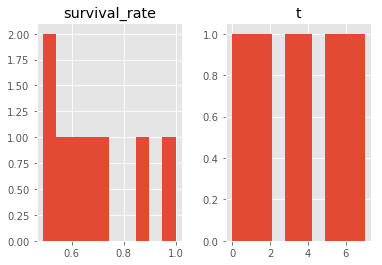

In [13]:
train_df.hist()


In [6]:
train_df

,t,survival_rate
0,0,1.000
1,1,0.869
2,2,0.743
3,3,0.653
4,4,0.593
5,5,0.551
6,6,0.517
7,7,0.491


In [41]:
model = smf.ols(formula = 'survival_rate ~ t', data = train_df).fit()
input = pd.DataFrame({'t': [9,10,11,12,13,14],
       'survival_rate': [0,0,0,0,0,0]},
   columns = ['t', 'survival_rate'])
model.predict(train_df)
model.predict(input)

0    0.286952
1    0.216012
2    0.145071
3    0.074131
4    0.003190
5   -0.067750
dtype: float64

In [43]:
input = pd.DataFrame({'t': [9,10,11,12,13,14],
       'survival_rate': [0,0,0,0,0,0]},
   columns = ['t', 'survival_rate'])
model.predict(input)

0    0.286952
1    0.216012
2    0.145071
3    0.074131
4    0.003190
5   -0.067750
dtype: float64

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     70.91
Date:                Wed, 26 Jul 2017   Prob (F-statistic):           0.000153
Time:                        20:07:11   Log-Likelihood:                 13.061
No. Observations:                   8   AIC:                            -22.12
Df Residuals:                       6   BIC:                            -21.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9254      0.035     26.258      0.000       0.839       1.012
t             -0.0709      0.008     -8.421      0.000      -0.092      -0.050
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.711
Skew:                           0.310   Prob(JB):                        0.701
Kurtosis:                       1.678   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0    0.925417
1    0.854476
2    0.783536
3    0.712595
4    0.641655
5    0.570714
6    0.499774
7    0.428833
dtype: float64